# STEP 1: Business Task
Business Objective:
Examine FitBit Fitness Tracker Data to gain insights into consumer engagement with the FitBit app and uncover trends and patterns for shaping Bellabeat's marketing strategy.

**Business Goals:**
1. What trends have been identified?
2. How might these trends resonate with Bellabeat's clientele?
3. In what ways can these trends inform Bellabeat's marketing strategy?


# STEP 2: PREPARE
2.1 Data Source Information:
* The data is publicly accessible on Kaggle: FitBit Fitness Tracker Data and is distributed across 18 csv files.
Compiled from participants who completed a survey via Amazon Mechanical Turk between March 12, 2016, and May 12, 2016.
Includes data from 30 consenting FitBit users who shared personal tracker data.
Data encompasses physical activity durations, heart rate, sleep patterns, daily activities, and step counts.
2.2 Data Set Limitations:
Data pertains to the year 2016, potentially outdated regarding users' behaviors and habits.
Limited sample size of 30 female FitBit users may not represent the broader female demographic.
Survey-based collection method raises concerns regarding data accuracy and reliability.
2.3 Data Evaluation: ROCCC Analysis
A preferable data source adheres to the ROCCC principles: Reliable, Original, Comprehensive, Current, and Cited.

Reliable - LOW - Sample size of 30 respondents may not be reliable for drawing robust conclusions.
Original - LOW - Data sourced from a third-party provider (Amazon Mechanical Turk).
Comprehensive - MED - Parameters align with many of Bellabeat's product features.
Current - LOW - Data is outdated, collected five years ago, potentially lacking relevance.
Cited - LOW - Origin of data from a third-party source introduces uncertainty.
Overall, the dataset exhibits poor quality, thus not advisable for generating business insights or recommendations.







# Step 3 : Process

In [121]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [122]:
daily_activity = pd.read_csv('./Fitabase Data 4.12.16-5.12.16 2/dailyActivity_merged.csv')
sleep=pd.read_csv('./Fitabase Data 4.12.16-5.12.16 2/sleepDay_merged.csv')
hourly_calories = pd.read_csv('Fitabase Data 4.12.16-5.12.16 2/hourlyCalories_merged.csv')
hourly_steps = pd.read_csv('Fitabase Data 4.12.16-5.12.16 2/hourlySteps_merged.csv')

In [123]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [124]:
daily_activity['Id'].nunique()

33

Inspection 

1. There are no null values, or missing data present in the dataset.

2. The DataFrame comprises 940 rows and 15 columns.

3. The 'ActivityDate' column is currently labeled as an object data type but needs to be converted to datetime64 data type.

4. Unexpectedly, there are 33 unique IDs detected instead of the expected 30 unique IDs, which should correspond to the number of fitness tracker users.

The following data manipulation is performed:

1. Convert *ActivityDate* to ```datatime64``` dtype.

2. Convert format of *ActivityDate* to ```yyyy-mm-dd```.

3. Create new column *DayOfTheWeek*.

4. Create new column *TotalMins* being the sum of *VeryActiveMinutes*, *FairlyActiveMinutes*, *LightlyActiveMinutes* and *SedentaryMinutes*.

5. Create new column *TotalHours* by converting new column in #4 to number of hours.

6. Rearrange and rename columns.

In [125]:
# convert "ActivityDate" to datatime64 dtype and format to yyyy-mm-dd
daily_activity["ActivityDate"]  = pd.to_datetime(daily_activity['ActivityDate'], format= "%m/%d/%Y")


In [126]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [127]:
# rearrange columns 

new_cols = ['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']

df_activity = daily_activity.reindex(columns=new_cols)

In [128]:
df_activity["DayOfTheWeek"] = df_activity['ActivityDate'].dt.day_name()

In [129]:
# rename columns
df_activity.rename(columns = {"Id":"id", "ActivityDate":"date", "DayOfTheWeek":"day_of_the_week", "TotalSteps":"total_steps", "TotalDistance":"total_dist", "TrackerDistance":"track_dist", "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"}, inplace = True)


In [130]:
# create new column "total_mins" containing sum of total minutes.
df_activity["total_mins"] = df_activity["very_active_mins"] + df_activity["fairly_active_mins"] + df_activity["lightly_active_mins"] + df_activity["sedentary_mins"]
df_activity['total_hours'] = round(df_activity['total_mins'] / 60)



In [131]:
# rename columns
daily_activity.rename(columns = {"Id":"id", "ActivityDate":"date", "DayOfTheWeek":"day_of_the_week", "TotalSteps":"total_steps", "TotalDistance":"total_dist", "TrackerDistance":"track_dist", "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"}, inplace = True)

# print column names to confirm
print(df_activity.columns.values)

['id' 'date' 'day_of_the_week' 'total_steps' 'total_dist' 'track_dist'
 'logged_dist' 'very_active_dist' 'moderate_active_dist'
 'light_active_dist' 'sedentary_active_dist' 'very_active_mins'
 'fairly_active_mins' 'lightly_active_mins' 'sedentary_mins' 'total_mins'
 'total_hours' 'calories']


##### Sleep

In [132]:
print(sleep.duplicated().sum())

3


In [133]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


**The issues were found with the sleep data:**
1. The issues were found with the sleep data:
2. The SleepDay column is wrongly formatted; object instead of datetime.
3. There are some duplicate records in the data.
4. There should be a day column for further analyses.
5. Column headers do not follow naming conventions.

**The following data manipulation is performed:**
1. Convert SleepDay from object to datetime
2. Create new sleep_day column
3. Drop duplicates.
4. Create a new column that converts TotalMinutesAsleep to hours
5. Rename the columns as lowercases according to naming convention.

In [134]:
sleep['SleepDay'] = sleep['SleepDay'].str.slice(0,9).str.replace(' ','')
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'], format="%m/%d/%Y")
sleep['sleep_day']=sleep['SleepDay'].dt.day_name()
sleep = sleep.drop_duplicates(keep='first')
sleep['total_sleep_hours']= round(sleep['TotalMinutesAsleep']/60)

In [135]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 412
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  410 non-null    int64         
 1   SleepDay            410 non-null    datetime64[ns]
 2   TotalSleepRecords   410 non-null    int64         
 3   TotalMinutesAsleep  410 non-null    int64         
 4   TotalTimeInBed      410 non-null    int64         
 5   sleep_day           410 non-null    object        
 6   total_sleep_hours   410 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 25.6+ KB


In [136]:
sleep.rename(columns=
{'Id': 'id', 'SleepDay':'sleep_date', 'TotalSleepRecords': 'total_sleep_records', 
'TotalMinutesAsleep': 'total_minutes_asleep', 'TotalTimeInBed': 'total_time_in_bed',
}, inplace=True)

print(sleep.columns)

Index(['id', 'sleep_date', 'total_sleep_records', 'total_minutes_asleep',
       'total_time_in_bed', 'sleep_day', 'total_sleep_hours'],
      dtype='object')


In [137]:
hourly_steps["ActivityHour"] = pd.to_datetime(hourly_steps["ActivityHour"])
hourly_calories["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])


In [138]:
merge_df = pd.merge(hourly_steps, hourly_calories,
                    on=['Id', 'ActivityHour'], how='inner')

In [139]:
merge_df["DateHour"] = merge_df["ActivityHour"].dt.hour

# Step 4 : Analyze 

###### Calculation 

Pulling the statistics of df_activity for analysis:
* count - no. of rows
* mean (average)
* std (standard deviation)
* min and max
* percentiles 25%, 50%, 75%

In [140]:
daily_activity.describe()

,id,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [141]:
daily_activity.columns

Index(['id', 'date', 'total_steps', 'total_dist', 'track_dist', 'logged_dist',
       'very_active_dist', 'moderate_active_dist', 'light_active_dist',
       'sedentary_active_dist', 'very_active_mins', 'fairly_active_mins',
       'lightly_active_mins', 'sedentary_mins', 'calories'],
      dtype='object')

In [142]:
#daily activity statistics
print(daily_activity[['total_dist', 'total_steps', 'calories','very_active_mins','sedentary_mins']].mean())

total_dist             5.489702
total_steps         7637.910638
calories            2303.609574
very_active_mins      21.164894
sedentary_mins       991.210638
dtype: float64


**Interpreting statistical findings:**
1. Step Count and Distance: The average step count of 7,637 steps or 5.4 km falls short of the recommended 10,000 steps or 8 km per day suggested by the CDC for general health benefits. This indicates that, on average, users are not meeting the recommended level of physical activity.

2. Sedentary Behavior: Sedentary users, who logged an average of 991 minutes or approximately 20 hours of sedentary activity per day, make up the majority, comprising 81% of the total average minutes. This highlights a concerning trend of sedentary behavior among the users.

***


In [143]:
sleep.describe()

,id,total_sleep_records,total_minutes_asleep,total_time_in_bed,total_sleep_hours
count,4.100000e+02,410.000000,410.000000,410.000000,410.000000
mean,4.994963e+09,1.119512,419.173171,458.482927,6.990244
std,2.060863e+09,0.346636,118.635918,127.455140,1.990172
min,1.503960e+09,1.000000,58.000000,61.000000,1.000000
25%,3.977334e+09,1.000000,361.000000,403.750000,6.000000
50%,4.702922e+09,1.000000,432.500000,463.000000,7.000000
75%,6.962181e+09,1.000000,490.000000,526.000000,8.000000
max,8.792010e+09,3.000000,796.000000,961.000000,13.000000


In [144]:
print(sleep[['total_minutes_asleep', 'total_time_in_bed']].mean())

print('The ratio of average time asleep to average time in bed is: '+str(sleep['total_minutes_asleep'].mean()/sleep['total_time_in_bed'].mean()))

total_minutes_asleep    419.173171
total_time_in_bed       458.482927
dtype: float64
The ratio of average time asleep to average time in bed is: 0.9142612433369862


# Visualization 

In [148]:
df_activity['day_of_the_week'].value_counts()

Tuesday      152
Wednesday    150
Thursday     147
Friday       126
Saturday     124
Sunday       121
Monday       120
Name: day_of_the_week, dtype: int64

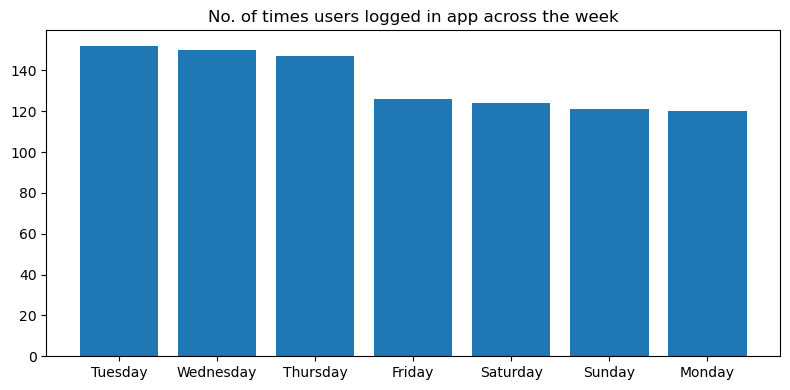

In [149]:
plt.figure(figsize=(8,4))

plt.bar(x = df_activity['day_of_the_week'].value_counts().index, height = df_activity['day_of_the_week'].value_counts().values)
plt.title("No. of times users logged in app across the week")
plt.tight_layout()


1. We discovered that users prefer or remember (giving them the doubt of benefit that they forgotten) to track their activity on the app during midweek from Tuesday to Friday. 

2. Noting that the frequency dropped on Friday and continue on weekends and Monday. 

In [150]:
np.median(df_activity['calories'])

2134.0

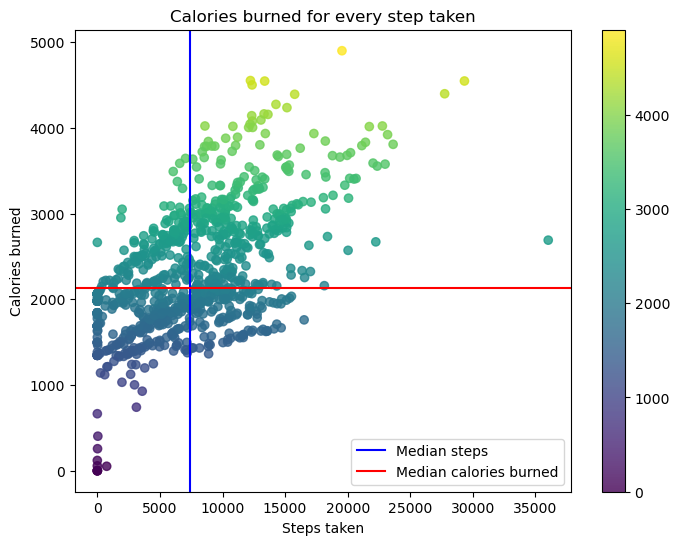

In [151]:
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(df_activity['total_steps'], df_activity['calories'], 
            alpha = 0.8, c = df_activity.calories)

median_calories = np.median(df_activity['calories'])
median_steps = np.median(df_activity['total_steps'])

plt.colorbar(orientation = 'vertical')
plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")

plt.legend()
plt.show()



Text(0.5, 1.0, 'How many hours do users sleep?')

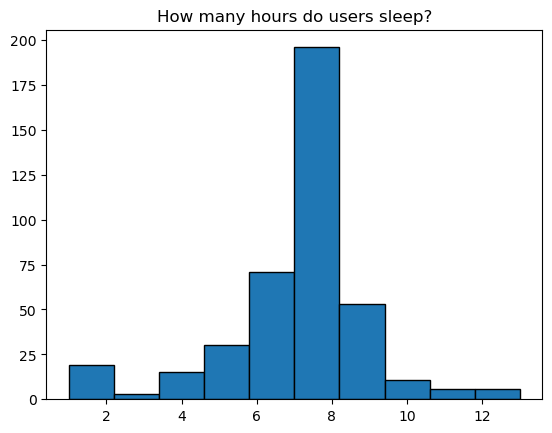

In [152]:
plt.hist(sleep['total_sleep_hours'], edgecolor = 'black')
plt.title('How many hours do users sleep?')

##### **Calories burned for every step taken**

Based on the observations from the scatter plot:

1.  The scatter plot shows a positive correlation between the number of steps taken and the calories burned.

2. We observed that intensity of calories burned increase when users are at the range of > 0 to 15,000 steps with calories burn rate cooling down from 15,000 steps onwards. 

3. Outliers: 
One observation where a user recorded over 35,000 steps but burned less than 3,000 calories. This could be an anomaly or error in data collection, as it seems unlikely for someone to take such a high number of steps while burning significantly fewer calories.


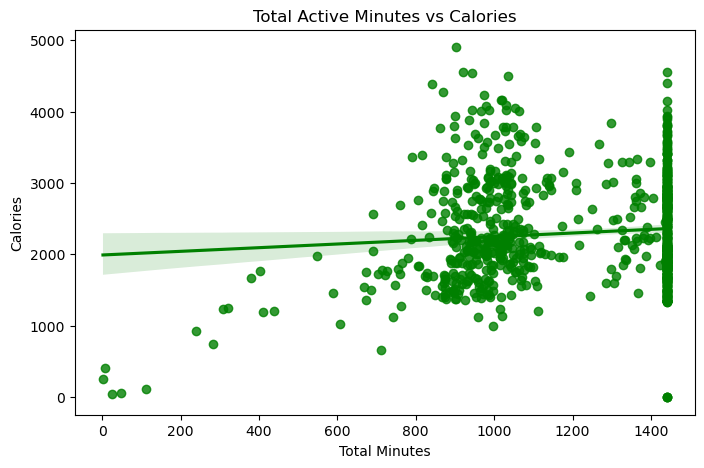

In [153]:

f, ax = plt.subplots(figsize=(8,5))
ax= sns.regplot(x='total_mins', y='calories', data=df_activity, color='green')

ax.set(xlabel='Total Minutes', ylabel='Calories', title='Total Active Minutes vs Calories');


In [154]:
activity_sleep=pd.concat([df_activity, sleep], axis=1)
activity_sleep.head(3)

,id,date,day_of_the_week,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,...,total_mins,total_hours,calories,id,sleep_date,total_sleep_records,total_minutes_asleep,total_time_in_bed,sleep_day,total_sleep_hours
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,...,1094,18.0,1985,1.503960e+09,2016-04-12,1.0,327.0,346.0,Tuesday,5.0
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,...,1033,17.0,1797,1.503960e+09,2016-04-13,2.0,384.0,407.0,Wednesday,6.0
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,...,1440,24.0,1776,1.503960e+09,2016-04-15,1.0,412.0,442.0,Friday,7.0


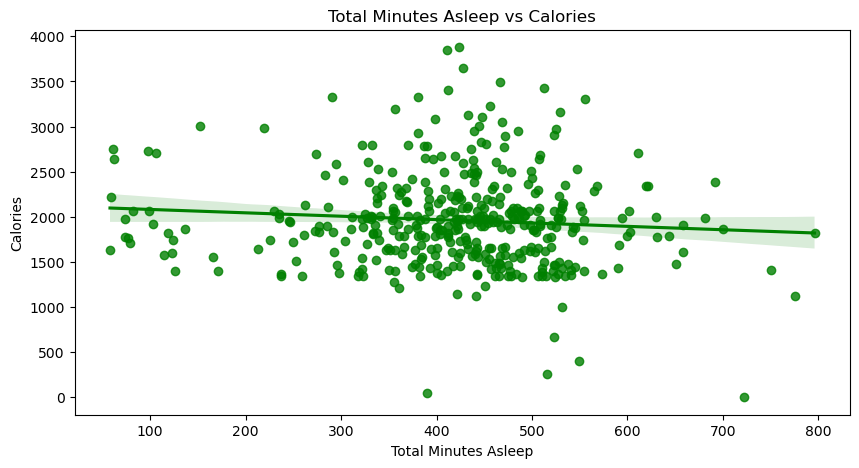

In [155]:
f, ax = plt.subplots(figsize=(10,5))
ax= sns.regplot(x='total_minutes_asleep', y='calories', data=activity_sleep, color='green')

ax.set(xlabel='Total Minutes Asleep', ylabel='Calories', title='Total Minutes Asleep vs Calories');

This plot shows that there is little to no correlation to the total minutes asleep and calories burned.This means that an increase or decrease in on variable will not likely have an effect on the other.

##### **Calories burned for every hour logged**

1. Weak Positive Correlation: The scatter plot indicates a weak positive correlation between the number of hours logged (presumably referring to sedentary hours) and the calories burned. This suggests that an increase in sedentary hours logged does not necessarily translate to a significant increase in calories burned. The purple line representing average sedentary hours falls within the 16 to 17 hours range, indicating a consistent sedentary behavior among users within this range. This could explain why there isn't a strong correlation between sedentary hours and calories burned.


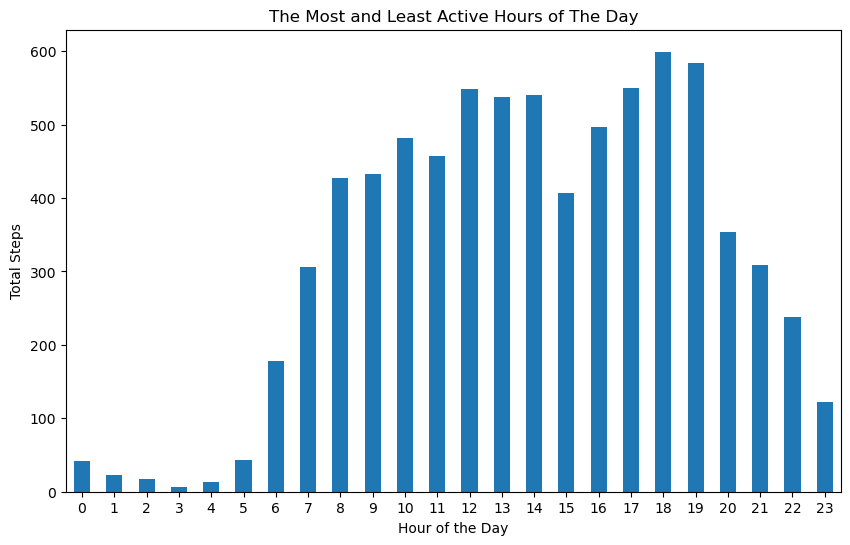

In [158]:
#Least active time of the day for targeted Ads

fig, axs = plt.subplots(figsize=(10, 6))
merge_df.groupby(merge_df['DateHour'])['StepTotal'].mean().plot(kind='bar', rot=0, ax=axs, title='The Most and Least Active Hours of The Day')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Steps")
plt.show()

,index,sedentary_mins,lightly_active_mins,very_active_mins,fairly_active_mins
0,mean,991.210638,192.812766,21.164894,13.564894


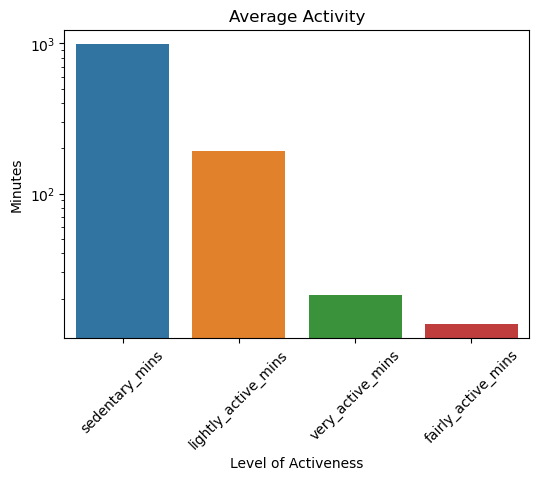

In [157]:
plt.figure(figsize = (6,4))
activity_mean=df_activity.agg(
    {'sedentary_mins': ['mean'],'lightly_active_mins': ['mean'], 'very_active_mins': ['mean'], 'fairly_active_mins': ['mean'] }).reset_index()
plt1 = sns.barplot(data= activity_mean, log=True)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=45)
plt1.set(xlabel='Level of Activeness', ylabel='Minutes',title='Average Activity')
activity_mean

Most of the minutes logged are sedentary minutes, followed by lightly active minutes.

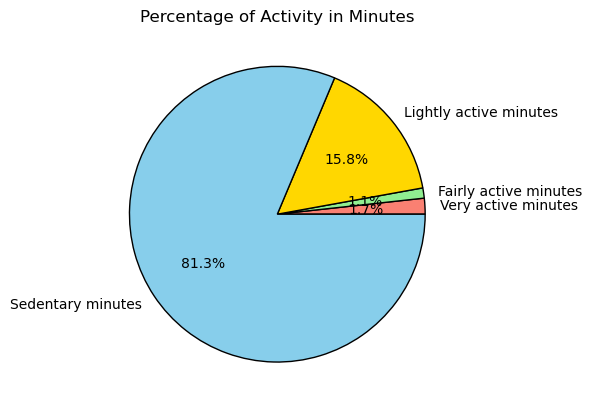

In [84]:
very_active_mins = df_activity["very_active_mins"].sum()
fairly_active_mins = df_activity["fairly_active_mins"].sum()
lightly_active_mins = df_activity["lightly_active_mins"].sum()
sedentary_mins = df_activity["sedentary_mins"].sum()

slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colors = ['salmon', 'lightgreen', 'gold', 'skyblue']  


plt.pie(slices, labels = labels, 
        colors = colors, wedgeprops = {"edgecolor": "black"}, 
        autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.show()

**Percentage of Activity in Minutes**

1. The largest portion of logged activity, accounting for 81.3%, is sedentary minutes.

2. This suggests that users utilize the FitBit app primarily for documenting everyday tasks like commuting, passive movements (shifting from one location to another), or completing errands.

3. Fitness tracking, particularly activities like running, is infrequently recorded using the app, evident from the minimal percentages of fairly active (1.1%) and very active activity (1.7%). This trend is disheartening considering the FitBit app's intended purpose of promoting fitness.

# STEP 6: ACT

Insights and Recommendation

Here, we revisit our business questions and share with you our high-level business recommendations.
 
**1. What are the trends identified?**

* The predominant trend indicates that a significant majority of users (81.3%) utilize the FitBit app primarily for tracking sedentary activities, rather than monitoring their health habits.

* Additionally, users demonstrate a preference for tracking their activities during weekdays in comparison to weekends. This inclination could be attributed to increased outdoor activities during weekdays and more indoor-based routines on weekends.


**2. How could these trends help influence Bellabeat marketing strategy?**

* The insights gleaned from these trends could guide Bellabeat's marketing strategy by focusing on educating users about the benefits of fitness and providing them with the necessary tools to achieve their health goals. This could involve offering information on various types of exercises, such as simple 10-minute routines on weekdays and more intensive workouts on weekends, as well as providing insights into calorie intake and expenditure through the Bellabeat app.

* Furthermore, Bellabeat could leverage these trends by implementing targeted notifications on weekends to encourage users to engage in physical activity. By actively prompting users to exercise during weekends, Bellabeat can help motivate them to maintain a consistent fitness regimen and achieve better health outcomes.


***

# 